<html>
<body>

<h1>tutorial #4:</h1>
<p>creating a winding with sinusoidally distributed conductors</p>
<p><img src="figure/koil_04.jpeg" width="300" align="left"/>
</p>
In some circumstances a winding with sinusoidally distributed conductors is needed. This is useful, for example, in the FE simulation of induction machines (IM) for variable speed drives. The IM can be simulated using a field oriented (FO) simulation strategy in which the rotor cage is substituted with two sinusoidally distrubuted winding, one along each axis (d and q). A sketch of the situation is reported in figure. <br> 
The main advantages of the FO simulation strategy are that the FE analysis is carried out in the rotor flux reference frame so that only magnetostatic FE simulations are used, reducing the computational time. Thanks to magnetostatic simulations, the saturation effects in all the machine parts is careful considered during all computations. The procedure is suitable for both the analysis and design of IMs, allowing a careful prediction of the drive performance from the design stage.

<p> Selected reference:<br>
    Luigi Alberti, Nicola Bianchi and Silverio Bolognani
    <em>"Variable-Speed Induction Machine Performance Computed Using Finite-Element",</em>
<em>IEEE Transactions on Industry Applications, </em>
2011<i>, Vol 47</i>, pp. 789-797,  <a href="https://ieeexplore.ieee.org/abstract/document/5688450">DOI:10.1109/TIA.2010.2103914</a>  </p> 
</body>
</html>



In [3]:
from dolomites import koil
import math
import matplotlib

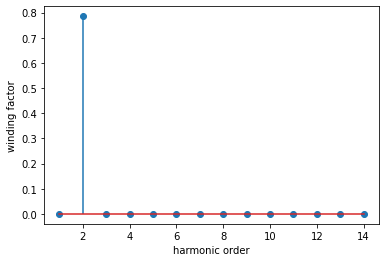

In [9]:
# Example of sinusoidal winding

Q = 240
p = 2
wa = koil.winding(Q,p)
wb = koil.winding(Q,p)
wc = koil.winding(Q,p)
    
for x in range(0, int(Q/2)):
    angle = math.pi/Q + 2.0*math.pi/Q*x
    na = 1*math.sin(angle*p)
    nb = 1000*math.sin(angle-2./3*math.pi)
    nc = 1000*math.sin(angle-4./3*math.pi)
    wa.add_coil(koil.coil(x+1,Q-x,na))
    wb.add_coil(koil.coil(x+1,Q-x,nb))
    wc.add_coil(koil.coil(x+1,Q-x,nc))
    
nu = []
kw = []
for _nu in range(1,15):
    nu.append(_nu)
    kw.append(wa.get_kw(_nu))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.stem(nu,kw)
plt.xlabel('harmonic order')
plt.ylabel('winding factor');



It is worth notice that there is only a single harmonic for the considered winding. The computed winding factor is:

In [10]:
kw

[0, 0.7853084492361943, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

The considered winding is sinusoidally distributed within a discrete number of slots. The computed $k_w$ can be compared with the theoretical value computed for a continuosly distributed winding:

$$
\dfrac{\int_0^\pi \sin^2 \vartheta d\vartheta}{\int_0^\pi \sin \vartheta d\vartheta} = \dfrac{\pi}{4} = 0.7854
$$


In [11]:
math.pi/4

0.7853981633974483